# Raport z projektu zaliczeniowego przedmiotu Nieklasyczne Metody Analizy Danych w Biznesie - opisanie badania zawartego pracy magisterskiej - <br> Przewidywanie zachowań klientów z wykorzystaniem segmentacji metodą k-średnich
**Daniel Struzik**


### Wstęp

Niniejszy raport opisuje badanie wykorzystane w mojej pracy magisterskiej pisanej pod roboczym tytułem ,,*Wykorzystanie modeli uczenia maszynowego w sklepach e-commerce*''. Eksperyment przeprowadzony w ramach pracy zakłada sprawdzenie, czy segmentacja klientów może poprawiać wyniki przewidywania zachowań klientów z wykorzystaniem metod uczenia maszynowego. Segmentacja klientów została przeprowadzona z wykorzystaniem metody k-średnich, po stworzeniu cech o w oparciu o metodę RFM (ang. *Recency*, *Frequency*, *Monetary* - kiedy dokonano ostatni zakup, jak często klient dokonuje zakupów, suma wydanych pieniędzy)

Zbiory danych zostały pobrane z [Kaggle](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store) i opisują działania podjęte przez klientów sklepu, opisane w następujący sposób:


*   `event_time` - czas zdarzenia w formacie UTC,
*   `event_type` - typ zdarzenia (możliwe wyświetlenie produktu - `view`, dodanie do koszyka - `cart`, zakup - `purchase`),
*   `product_id` - identyfikator produktu,
*   `category_id` - identyfikator kategorii produktu,
*   `categore_code` - połączone nazwy kategorii i podkategorii produktu,
*   `brand` - marka produktu,
*   `price` - cena produktu,
*   `user_id` - identyfikator klienta,
*   `user_session` - unikalny identyfikator sesji klienta.

Ostatecznie zdecydowano się na pobranie wszystkich dostępnych danych (dla 7 miesięcy - jeden zbiór danych zawiera wszystkie zdarzenia z danego miesiąca październik 2019 - kwiecień 2020) i po wyczyszczeniu, przygotowaniu cech oraz po połączeniu (pojedynczy zbiór, po usunięciu wierszy z brakami danych waży od 4-8 GB, co utrudnia operowanie danymi) zostały z nich przygotowane 2 zbiory danych, wykorzystane do przeprowadzenia ekserymentu - zbiór zawierający zdarzenia, oraz zbiór zawierający segmenty przypisane poszczególnym klientom. Warto zaznaczyć, że mimo sporych rozmiarów, ostateczne zbiory danych są stosunkowo małe, ponieważ ze względu na specyfikę analizy RFM, brani są do niej są tylko ci klienci, którzy kiedykolwiek dokonali zakupu. Druga faza badania (przewidywanie zachowania klientów z przypisanymi segmentami), zawiera więc mniej obesrwacji, niż pierwsza (przewidywanie zachowania klientów bez wypracowanych segmentów zawiera także klientów, którzy dodali produkty do koszyka, lecz nigdy nie kupili czegokolwiek w sklepie). Przewidywanie zachowania klientów zostało oparte o szereg opracowanych cech takich jak: aktywność użytkownika w sesji, łączna aktywność użytkownika w miesiącu, czy tygodniowa sprzedaż danego produktu. Ostatecznie, za pomocą zebranych cech, przewidywane jest, to czy klient dokona zakupu produktu, czy nie. Celem badania jest wykazanie, że segmentacja klientów pozwala lepiej przewidywać ich zachowania. 

Szczegółwe kroki opisane są w notaniku `NMADwB_kod.ipynb` zamieszczonym na dysku google podlinkowanym w mailu.



### Spis treści <a name="0"></a>


1.   [Eksploracja niewyczyszczonego zbioru danych na przykładzie jednego miesiąca](#1)

2.   [Omówienie eksperymentu](#2)

3.   [Wyniki oraz wnioski](#3)

## Eksploracja niewyczyszczonego zbioru danych na przykładzie jednego miesiąca <a name="1"></a>

### Charakterystyka przykładowego zbioru danych - Październik 2019


*   Niewyczyszczony zbiór danych zawiera 42448764 wierszy oraz 9 kolumn.
*   Zdarzenie `purchase` miało miejsce 742849 razy. 1.75% wszystkich zdarzeń stanowi `purchase`
*   Liczba unikalnych odwiedzających : 3022290
*   Liczba unikalnych sesji: 9244421
*   Liczba uniklanych produktów: 166794


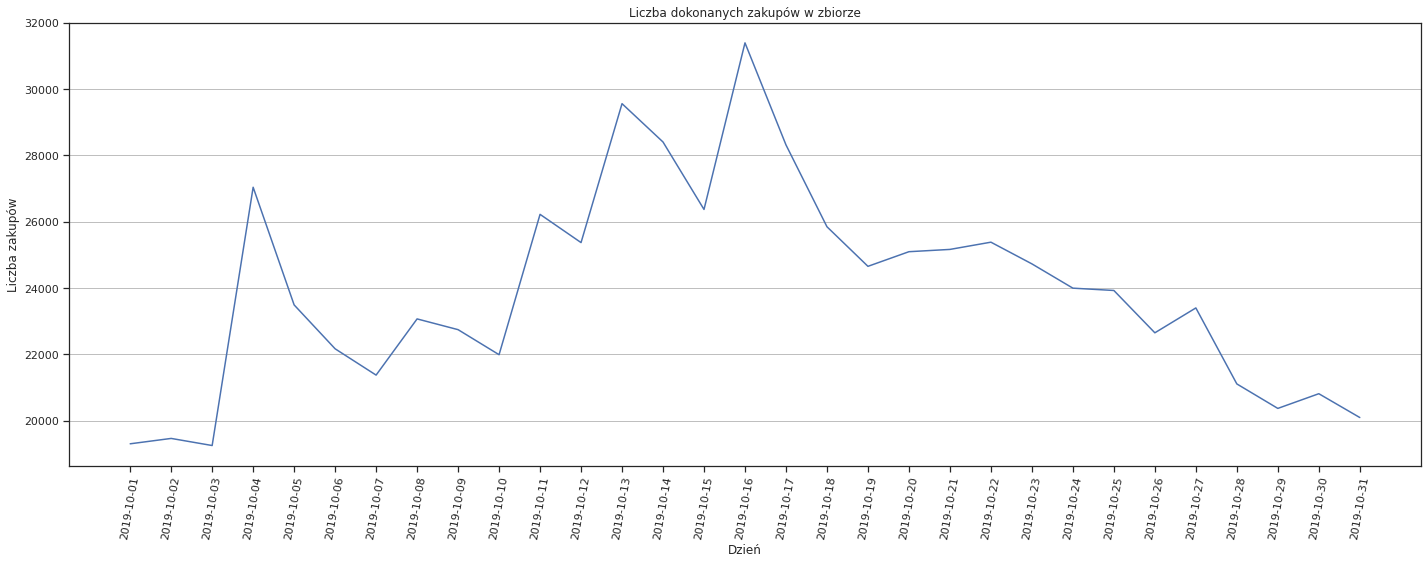

Najwięcej - ponad 30 tys. - zakupów dokonano 16 października.

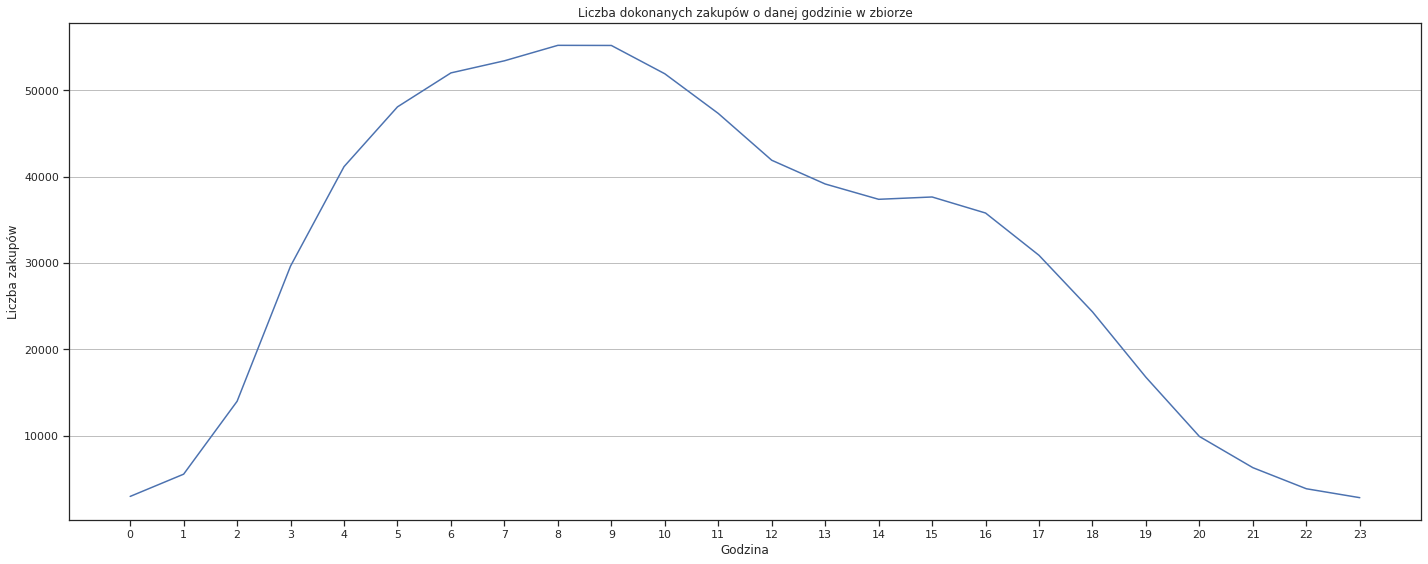

Najwięcej zakupów dokonywanych jest między godziną 7 i 10 czasu UTC, co może sugerować, że sklep nie znajduje się w Europie.

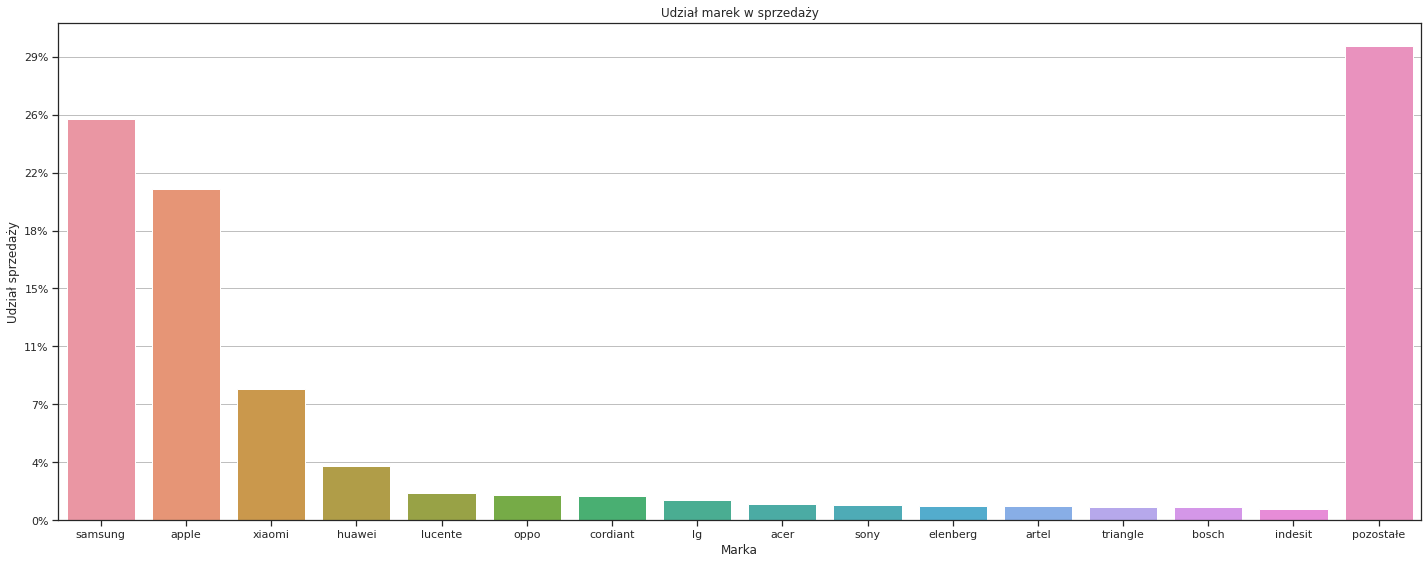

Ponad połowę zakupionych produktów stanowią produkty trzech marek.

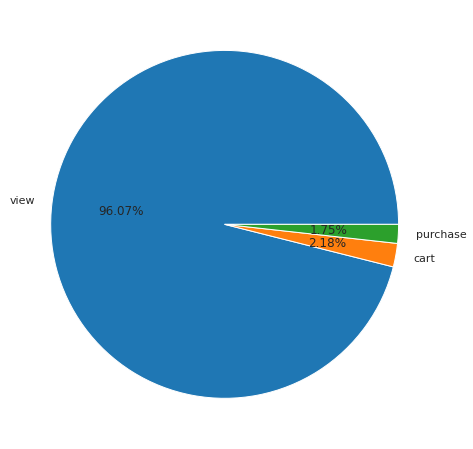

Struktura kolumny `event_type` - 96% akcji w październiku stanowiło `view`. 

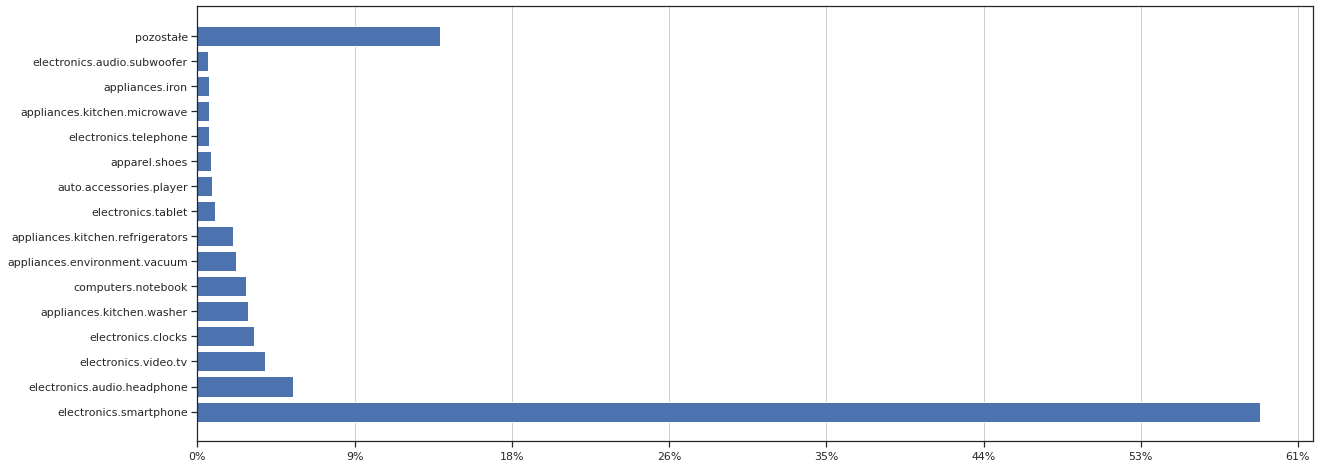

Ponad połowę sprzedanych produktów stanowi kategoria `smartphone`.

[Powrót do spisu treści](#0)

## Omówienie eksperymentu <a name="2"></a>

Eksperyment zakłada porównanie zdolności przewidywania sześciu modeli uczenia maszynowego: naiwnego klasyfikatora Bayes'a, regresji logistycznej, drzewa decyzyjnego, lasu losowego, XGBoost oraz LightGBM.

Eksperyment, poza przygotowaniem danych, składa się następujących etapów:
1.   Przewidywania, czy klient dokona zakupu,
2.   Segmentacji klientów,
3.   Przewidywania, czy klient dokona zakupu, z przypisanymi segmentami.

Celem eksperymentu jest określenie, czy segmentacja klientów poprawia możliwości przewidywania zachowań klientów.




Zbiór użyty w pierwszym etapie, został przygotowany za pomocą kodu umieszczonego w pliku `NMADwB_kod.ipynb` i zawiera następujące kolumny:

*   `user_id` - identyfikator klienta,
*   `brand` - marka produktu,
*   `category_code_level1` - pierwsza część kategorii produktu,
*   `category_code_level2` - druga część kategorii produktu,
*   `price` - cena produktu,
*   `event_year` - rok zdarzenia
*   `event_month` - miesiąc zdarzenia,
*   `event_monthday` - dzień miesiąca zdarzenia,
*   `week_no` - tydzień miesiąca zdarzenia,
*   `event_weekday` - dzień tygodnia zdarzenia,
*   `event_hour` - godzina zdarzenia,
*   `activity_count` - liczba aktywności użytkownika w sesji,
*   `activity_count_month` - liczba aktywności użytkownika w miesiącu,
*   `avg_weekly_sale_price` - średnia cena produktu w tygodniu,
*   `weekly_sales_count` - liczba sprzedanych produktów o tym `id` w 
*   `is_purchased` - zmienna binarna celu - czy klient dokonał zakupu.


Kolumna `user_id` nie jest brana pod uwagę w modelowaniu, potrzebna jest do przypisania segmentów. Kolumna `event_year` również nie jest brana pod uwagę, ze względu na obecność tylko dwóch lat w zbiorze.

Zbiór danych użyty przewidywania jest identyczny ze zbiorem bez segmentów, tylko zawiera kolumnę `clusters_3`, która przypisuje klientom jeden z trzech klastrów, przygotowanych za pomocą metody k-średnich oraz cechy pochodzących z metody RFM.

Do oceny modeli służyła miara dokładności, określana na zbiorze treningowym/testowym oraz za pomocą walidacji krzyżowej.


[Powrót do spisu treści](#0)

## Wyniki oraz wnioski <a name="3"></a>

Wyniki zostały opisane w poniżej tabeli.
Niestety, tabela nie pokazuje się poprawnie w formacie `.pdf`, dlatego lepiej otworzyć raport w formacie `.ipynb` zamieszczonym na dysku.

Modelem, który najlepiej przewiduje zachowania klientów, bez dodanych segmentów, jest model LightGBM, z dokładnością predykcji na zbiorze testowym wynoszącą 0.66. Biorąc pod uwagę walidację krzyżową, najlepszym modelem jest XGBoost (0.5661 średniej dokładności). Po dokonanej hiperparametryzacji modeli, najlepszym modelem jest model XGBoost, jednak po przeprowadzeniu walidacji krzyżowej najlepszą dokładność wykazuje model drzew decyzyjnych.

Po dodaniu do zbioru segmentów, naiwny klasyfikator Bayes'a oraz regresja logistyczna osiągnęły gorszą dokładność niż przed dodaniem segmentów, jednak poprawiły wyniki walidacji krzyżowej. Najlepszym modelem ponownie został LightGBM, jednak najlepszą dokładność w walidacji krzyżowej osiągnął model regresji logistycznej. Po hiperparametryzacji modeli XGBoost oraz LighGBM osiągnęły identyczne wyniki dokładności wynoszący 0.73, a najlepszym modelem po walidacji krzyżowej został ponownie model drzew decyzyjnych z wynikiem 0.62.

Udowodniono więc, że stworzone modele, po dodaniu segmentacji klientów, lepiej przewidują zachowania klientów.

Dodatkowe wykresy opisujące modele (drzewa decyzyjne, XGBoost i LightGBM) znajdują się w notatniku `NMADwB_kod.ipynb` na udostępnionym dysku.

|                                   **Tabela wyników**                                   | **Brak segmentów** |                        |                                   |                                                       |                                                      |                                                      | **Z segmentami** |                        |                                   |                                                       |                                                       |                                                       |   |   |
|:--------------------------------------------------------------------------------------:|:------------------:|:----------------------:|:---------------------------------:|:-----------------------------------------------------:|:----------------------------------------------------:|:----------------------------------------------------:|:----------------:|:----------------------:|:---------------------------------:|:-----------------------------------------------------:|:-----------------------------------------------------:|:-----------------------------------------------------:|---|---|
|                                          Model                                         |        Bayes       |       Logistyczna      |          Drzewo decyzyjne         |                 Las losowy<br>(10 est)                |                 XGBoost<br>(gpu_hist)                |                LightGBM<br>(unit=GPU)                |       Bayes      |       Logistyczna      |          Drzewo decyzyjne         |                 Las losowy<br>(10 est)                |                 XGBoost<br>(gpu_hist)                 |                 LightGBM<br>(unit=GPU)                |   |   |
|                                 **Domyślne parametry**                                 |                    |                        |                                   |                                                       |                                                      |                                                      |                  |                        |                                   |                                                       |                                                       |                                                       |   |   |
| Accuracy                                                                               |       0.5658       |         0.5532         |               0.6416              |                         0.6603                        |                        0.6452                        |                        0.6623                        |      0.5499      |         0.5518         |               0.6679              |                         0.6898                        |                         0.7123                        |                         0.7318                        |   |   |
| Precision                                                                              |       0.5164       |         0.5026         |               0.5954              |                         0.6160                        |                        0.5686                        |                        0.5836                        |      0.6470      |         0.6185         |               0.7402              |                         0.7603                        |                         0.7148                        |                         0.7279                        |   |   |
| Recall                                                                                 |       0.5311       |         0.5568         |               0.6319              |                         0.6484                        |                        0.8720                        |                        0.8674                        |      0.4921      |         0.5918         |               0.6582              |                         0.6787                        |                         0.8381                        |                         0.8579                        |   |   |
| F1                                                                                     |       0.5624       |         0.5519         |               0.6397              |                         0.6583                        |                        0.6382                        |                        0.6576                        |      0.5498      |         0.5436         |               0.6649              |                         0.6868                        |                         0.6916                        |                         0.7119                        |   |   |
| Czas                                                                                   |        7.84s       |        1min 36s        |              3min 11s             |                        4min 1s                        |                         11.1s                        |                       1min 29s                       |       10.7s      |        1min 53s        |              2min 14s             |                        3min 9s                        |                          9.4s                         |                        1min 19s                       |   |   |
| **Walidacja krzyżowa dla modeli<br>wytrenowanych na <br>domyślnych parametrach, CV=5** |                    |                        |                                   |                                                       |                                                      |                                                      |                  |                        |                                   |                                                       |                                                       |                                                       |   |   |
| Test accuracy                                                                          |       0.5617       |         0.5557         |               0.5397              |                         0.5576                        |                        0.5661                        |                        0.5473                        |      0.5680      |         0.5913         |               0.5123              |                         0.5211                        |                         0.5648                        |                         0.5265                        |   |   |
| Test precision                                                                         |       0.5141       |         0.5251         |               0.5658              |                         0.6080                        |                        0.6121                        |                        0.5990                        |      0.6051      |         0.5904         |               0.6459              |                         0.6802                        |                         0.6985                        |                         0.6800                        |   |   |
| Test recall                                                                            |       0.3961       |         0.2353         |               0.4999              |                         0.4823                        |                        0.5735                        |                        0.5440                        |      0.7420      |         0.9632         |               0.5266              |                         0.5216                        |                         0.6367                        |                         0.5718                        |   |   |
| Test F1                                                                                |       0.4360       |         0.3170         |               0.4347              |                         0.4328                        |                        0.4707                        |                        0.4487                        |      0.6609      |         0.7315         |               0.4828              |                         0.4847                        |                         0.5543                        |                         0.5125                        |   |   |
| Czas                                                                                   |        30.2s       |        9min 54s        |             10 min 53s            |                       26min 15s                       |                         49.9s                        |                       6min 55s                       |       42.2s      |        12min 16s       |              9min 1s              |                       15min 50s                       |                         38.7s                         |                        5min 27s                       |   |   |
|                                  **Wybrane parametry**                                 |                    |                        |                                   |                                                       |                                                      |                                                      |                  |                        |                                   |                                                       |                                                       |                                                       |   |   |
|       **Wybrane parametry pod kątem<br> accuracy lub <br>polepszenia wyników CV**      |          -         | max_iter=500,<br>C=0.1 | max_leaf_nodes=16,<br>max_depth=7 | n_estimators=20,<br>max_leaf_nodes=16,<br>max_depth=7 | learning_rate=1,<br>n_estimators=250,<br>max_depth=4 | learning_rate=1,<br>n_estimators=200,<br>max_depth=4 |         -        | max_iter=500,<br>C=0.1 | max_leaf_nodes=16,<br>max_depth=7 | n_estimators=20,<br>max_leaf_nodes=16,<br>max_depth=7 | learning_rate=1,<br>n_estimators=250,<br>max_depth=4} | learning_rate=1,<br>n_estimators=200,<br>max_depth=4} |   |   |
| Accuracy                                                                               |          -         |         0.5551         |               0.6208              |                         0.6253                        |                        0.6669                        |                        0.6661                        |         -        |         0.5561         |               0.7003              |                         0.7059                        |                         0.7314                        |                         0.7314                        |   |   |
| Precision                                                                              |          -         |         0.5046         |               0.5471              |                         0.5512                        |                        0.5897                        |                        0.5892                        |         -        |         0.6223         |               0.6786              |                         0.6817                        |                         0.7330                        |                         0.7323                        |   |   |
| Recall                                                                                 |          -         |         0.5472         |               0.9074              |                         0.8947                        |                        0.8512                        |                        0.8488                        |         -        |         0.5960         |               0.9177              |                         0.9242                        |                         0.8441                        |                         0.8457                        |   |   |
| F1                                                                                     |          -         |         0.5533         |               0.6059              |                         0.6129                        |                        0.6637                        |                        0.6630                        |         -        |         0.5479         |               0.6547              |                         0.6605                        |                         0.7140                        |                         0.7136                        |   |   |
| Czas                                                                                   |          -         |        6min 46s        |             1 min 10s             |                        2min 30s                       |                         16.5s                        |                       2min 36s                       |         -        |        8min 16s        |               49.2s               |                        2min 44s                       |                         12.1s                         |                        1min 56s                       |   |   |
| **Walidacja krzyżowa dla modeli<br> wytrenowanych na <br>wybranych parametrach, CV=5** |                    |                        |                                   |                                                       |                                                      |                                                      |                  |                        |                                   |                                                       |                                                       |                                                       |   |   |
| Test accuracy                                                                          |          -         |         0.5589         |               0.5890              |                         0.5804                        |                        0.5154                        |                        0.5239                        |         -        |         0.5884         |               0.6235              |                         0.6139                        |                         0.4878                        |                         0.5127                        |   |   |
| Test precision                                                                         |          -         |         0.5227         |               0.6280              |                         0.6281                        |                        0.5767                        |                        0.5793                        |         -        |         0.5910         |               0.7235              |                         0.7213                        |                         0.6422                        |                         0.6661                        |   |   |
| Test recall                                                                            |          -         |         0.2337         |               0.7035              |                         0.5583                        |                        0.5175                        |                        0.5209                        |         -        |         0.9415         |               0.7566              |                         0.7306                        |                         0.5591                        |                         0.5471                        |   |   |
| Test F1                                                                                |          -         |         0.3222         |               0.5323              |                         0.4764                        |                        0.4273                        |                        0.4263                        |         -        |         0.7253         |               0.6168              |                         0.6036                        |                         0.4890                        |                         0.4934                        |   |   |
| Czas                                                                                   |          -         |        46min 51s       |              3min 28s             |                       16min 44s                       |                       1min 14s                       |                       13min 37s                      |         -        |        55min 44s       |              2min 51s             |                       10min 35s                       |                         59.1s                         |                       10min 30s                       |   |   |

[Powrót do spisu treści](#0)